In [1]:
import sys
sys.path.insert(0, '../')

import numpy as np
from nn_momentum import sigmoid, sigmoidPrime, feedforward, backpropagation, loss, model
import matplotlib.pyplot as plt
from random import randint
import csv
import sklearn
from sklearn.preprocessing import MinMaxScaler
import time
import pickle

def load_model(name):
    f = open("save weights/momentum/"+name, 'rb')
    return pickle.load(f)
    
def save_model(name, w):
    f = open("save weights/momentum/"+name, 'wb')
    pickle.dump(w, f)
    
def training(steps, weights_, bias_, X_, y_, batch_size, epochs, val_period, decay_rate, decay_steps, learning_rate, alpha, l2_lambda):
    num_batch = int(X_.shape[0]/ batch_size)
    for i in range(epochs+1):
        if(steps%decay_steps == 0):
            lr = np.power(decay_rate, steps/decay_steps)*learning_rate 
        for rr in range(num_batch):
            input_x = X_[batch_size*rr:batch_size*(rr+1)]
            input_y = y_[batch_size*rr:batch_size*(rr+1)]
            aa = feedforward(input_x, weights_, bias_)

            if(i==0):
                vw_old = [0 for i in range(len(weights_))]
                vb_old = [0 for i in range(len(bias_))]

            weights_, bias_, vw_old, vb_old = backpropagation(input_y, vw_old, vb_old, aa, weights_, bias_, alpha=alpha, learning_rate=lr, l2_lambda=l2_lambda)
            steps+=1
            
        if(i%val_period==0):
            aa = feedforward(X_, weights_, bias_)
            yd = aa[-1]
            lo = loss(y_, yd)
            save_model('1', [weights, bias, steps, learning_rate])   
            print(i, lo)
    return weights_, bias_, steps

In [2]:
f = open('data.txt', 'r')

data_x = []
data_y = []

for i, tt in enumerate(f):
    if(i>0):
        tmp = tt.split()
        data_x.append([float(tmp[2]), float(tmp[3]), float(tmp[4])])
        data_y.append([float(tmp[0]), float(tmp[1])])
        
X = np.array(data_x, dtype=float)
y = np.array(data_y, dtype=float) + 0.3

In [3]:
# data_x = []
# data_y = []
# f = open('DATA.csv', 'rt')
# reader = csv.reader(f)
# for line in reader:
#     data_x.append(line[:3])
#     data_y.append(line[3:])

# scaler = MinMaxScaler(feature_range=(0, 1))
# rescaledX = scaler.fit_transform(data_x)
# rescaledY = scaler.fit_transform(data_y)
# # summarize transformed data
# np.set_printoptions(precision=3)

In [ ]:
start = time.time()
layer = [3, 100, 20, 10, 10, 2]
learning_rate = 0.001
alpha = 0.8
l2_lambda = 0
batch_size = 1199
num_batch = int(X.shape[0]/ batch_size)

np.random.seed(0)
weights, bias = model(layer)
for i in range(500000+1):
    for rr in range(num_batch):
        input_x = X[batch_size*rr:batch_size*(rr+1)]
        input_y = y[batch_size*rr:batch_size*(rr+1)]
        aa = feedforward(input_x, weights, bias)
        
        if(i==0):
            vw_old = [0 for i in range(len(weights))]
            vb_old = [0 for i in range(len(bias))]
            
        weights, bias, vw_old, vb_old = backpropagation(input_y, vw_old, vb_old, aa, weights, bias, alpha=alpha, learning_rate=learning_rate, l2_lambda=l2_lambda)

    if(i%10000==0):
        aa = feedforward(X, weights, bias)
        yd = aa[-1]
        lo = loss(y, yd)
        print(i, lo)
        save_model('2', [weights, bias])   
        
save_model('2', [weights, bias])   
print('Time:', time.time()-start)

0 0.0028054901313
10000 0.00180809886865
20000 0.00171959083669
30000 0.00162262168813
40000 0.00154308535001
50000 0.00150302952563
60000 0.0014705991365
70000 0.00143942026606
80000 0.00141594563631
90000 0.00139531106099
100000 0.00137597185936
110000 0.00135984043018
120000 0.00134756131131


In [3]:
[weights, bias] = load_model('2')

In [4]:
start = time.time()
learning_rate = 0.001
alpha = 0.8
l2_lambda = 0
batch_size = 1199
num_batch = int(X.shape[0]/ batch_size)

for i in range(500000+1):
    for rr in range(num_batch):
        input_x = X[batch_size*rr:batch_size*(rr+1)]
        input_y = y[batch_size*rr:batch_size*(rr+1)]
        aa = feedforward(input_x, weights, bias)
        
        if(i==0):
            vw_old = [0 for i in range(len(weights))]
            vb_old = [0 for i in range(len(bias))]
            
        weights, bias, vw_old, vb_old = backpropagation(input_y, vw_old, vb_old, aa, weights, bias, alpha=alpha, learning_rate=learning_rate, l2_lambda=l2_lambda)

    if(i%10000==0):
        aa = feedforward(X, weights, bias)
        yd = aa[-1]
        lo = loss(y, yd)
        print(i, lo)
        save_model('2', [weights, bias])   
        
save_model('2', [weights, bias])   
print('Time:', time.time()-start)

0 0.000942872746734
10000 0.00093325397008
20000 0.000930239680279
30000 0.000927522594578
40000 0.000924970338007
50000 0.000922502999852
60000 0.000920077184031
70000 0.000917676514903
80000 0.000915303102286
90000 0.000912967321828
100000 0.000910678953054
110000 0.000908442712738
120000 0.000906256860796
130000 0.000904112924375
140000 0.000901996500239
150000 0.00089988896898
160000 0.00089776889444
170000 0.000895611497828
180000 0.000893384085586
190000 0.000891035650754
200000 0.000888486557793
210000 0.000885642172926
220000 0.000882441922421
230000 0.0008789020588
240000 0.000875144712698
250000 0.000871383733812
260000 0.000867817503551
270000 0.000864550858208
280000 0.000861604617329
290000 0.00085895011463
300000 0.00085653809497
310000 0.000854316193099
320000 0.000852236371978
330000 0.000850257907421
340000 0.000848353114573
350000 0.000846521352027
360000 0.000844785820374
370000 0.000843155315581
380000 0.000841615985701
390000 0.000840147045902
400000 0.000838730022

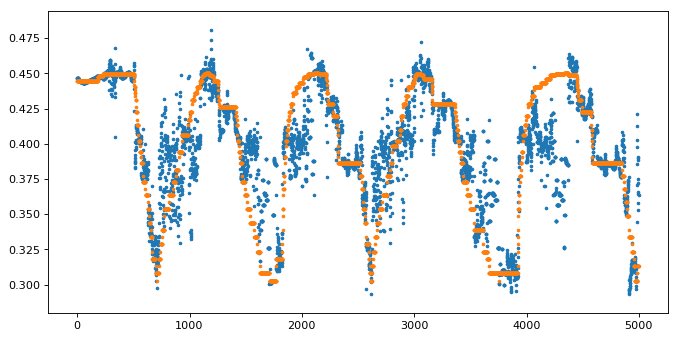

In [6]:
aa = feedforward(X, weights, bias)
yd = aa[-1]

from matplotlib import pyplot
num = len(X)
time = [i for i in range(num)]
fig=pyplot.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
pyplot.scatter(time, yd[:, 0], s=5)
pyplot.scatter(time, y[:, 0], s=5)
pyplot.show()

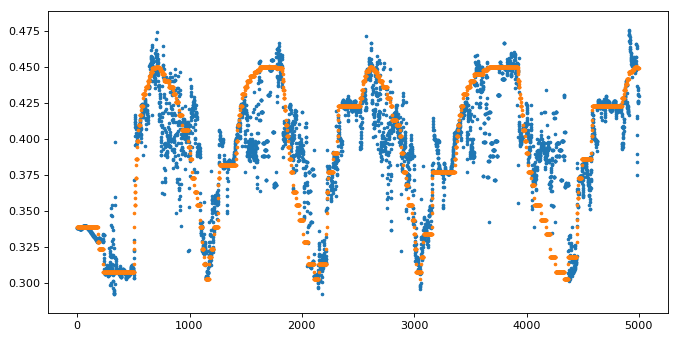

In [7]:
from matplotlib import pyplot
num = len(X)
time = [i for i in range(num)]
fig=pyplot.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
pyplot.scatter(time, yd[:, 1], s=5)
pyplot.scatter(time, y[:, 1], s=5)
pyplot.show()

In [29]:
# f = open("save weights/momentum_norm/1", 'rb')
# pickle.load(f) 